In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import cv2
from cv2 import xfeatures2d 
import math
import matplotlib as mplt
import shutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from shutil import copyfile


import os
import sys

aft_nrrd_path ="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined/"
aft_tif_path="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/"           
#project result of xy

bef_nrrd_path ="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_before/"
bef_tif_path="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_before_xy/"

In [2]:
def plot_mip(nrrd, ax=None, mip_direction='XY'):
    img = sitk.ReadImage(nrrd)
    array = sitk.GetArrayFromImage(img)
    mip = np.max(array, axis=mip_dict[mip_direction])

    #if ax is None:
        #plt.imshow(mip, cmap='Greys_r')
        #plt.axis('off')
    #else:
        #ax.imshow(mip, cmap='Greys_r')
        #ax.axis('off')
    return mip
def get_intensity_2d(img, x, y, r):
    if r==0:
        return img[x,y][0]
    ct = 0
    intensity=0
    #r = int(r+0.5)
    xa = max(int(x-0.5) - r, 0)
    xb = min(int(x-0.5) + r + 1, img.shape[0])
    ya = max(int(y-0.5) - r, 0)
    yb = min(int(y-0.5) + r + 1, img.shape[1])
    
    tp = np.zeros(img.shape)
    
    for i in range(xa, xb):
        for j in range(ya, yb):
            dist = np.sqrt((x-i)**2 + (y-j)**2)
            if dist>r:
                continue
            ct = ct + 1
            intensity = intensity + img[i,j][0]
    #print(ct)
    if ct>0:
        intensity = intensity / ct
    return intensity


In [3]:

def project(nrrd_path,tif_path):
    sample_list = sorted([i for i in os.listdir(nrrd_path) if i.endswith("tif")])
    for n_sample, nrrd in enumerate(sample_list):
        block_id = "_".join(nrrd.split("_")[2:6])
        mip = plot_mip(nrrd_path + nrrd, None,mip_direction='XY')
        cv2.imwrite(tif_path+nrrd,mip)
    return 0
        
def tif_plot(tif_path,r,curve):
#all tips' intensity    
    tif_list = sorted([i for i in os.listdir(tif_path) if i.endswith("tif")])
    print(len(tif_list))
    y={}
    for n_sample, tif in enumerate(tif_list):
        img=cv2.imread(tif_path+tif)
        intes=[]
        for i in range(r):
            intensity=get_intensity_2d(img,25,25,i) #radius=i
            intes.append(intensity)
        y[str(n_sample)]=intes
    x=list(range(r))
#plot average curve
    if curve: #only show average curve
        total_intes=[0]*r
        for i,intes in y.items():  
            arr_intes=np.array(intes)
            if (len(arr_intes)==len(total_intes)):
                total_intes=np.sum([total_intes,arr_intes],axis=0)
        if len(y)!=0:
            total_intes=total_intes / len(y)
            #total_intes=[a+b for a,b in zip(total_intes,intes)]
        return (x,total_intes)          
#plot all curves
    else:
          return (x,y)
#         plt.figure(figsize=(10,6))
#         for i,intes in y.items():    
#             #print(intes)
#             plt.plot(x,intes,color=clo)
#         plt.xlabel('Radius')
#         plt.ylabel('Intensity')
#         plt.show() 

In [4]:
#projecting all 3D tif
project(aft_nrrd_path,aft_tif_path)
project(bef_nrrd_path,bef_tif_path)

NameError: name 'mip_dict' is not defined

In [5]:
x,y=tif_plot(aft_tif_path,10,1)
x1,y1=tif_plot(bef_tif_path,10,1)

5499
5499


[100.82851428 101.67333455  97.61834383  92.1757828   87.60982848
  82.78106491  79.78547942  77.49768975  75.44894037  73.86106203]
[97.14748136 97.38340304 93.65759064 88.89448587 85.07123539 81.0621563
 78.53138245 76.55700047 74.74483006 73.31743185]


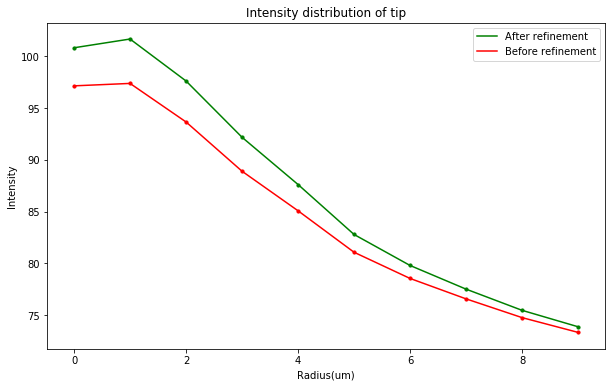

In [10]:
print(y)
print(y1)
plt.figure(figsize=(10,6))
plt.plot(x,y,color='green',label="After refinement")
plt.plot(x1,y1,color='red',label="Before refinement")
plt.scatter(x,y,c='g',s=10)#画散点图
plt.scatter(x1,y1,c='r',s=10)#画散点图
plt.legend(loc = 'upper right')
plt.title('Intensity distribution of tip')
plt.xlabel('Radius(um)')
plt.ylabel('Intensity')
plt.show()  

In [ ]:
# import numpy as np 
# import cv2 as cv 
# from matplotlib import pyplot as plt 
# def histogram_demo(image): 
#     plt.hist(image.ravel(), 256, [0, 256])#ravel函数功能是将多维数组降为一维数组 
#     plt.show() 
# image = cv.imread('/home/braincenter5/Desktop/bouton/17302s/28swc_before_pruning/17302_before_pruning_swc/17302_00006_axon_block/tip_17302_00006_36_17289.7_15686.3_3179.68_croped.tif', 1) 
# cv.imshow('souce image', image) 
# histogram_demo(image) 
# cv.waitKey(0) 
# cv.destroyAllWindows()

In [6]:
#calculate the distance and intensity change
def dis_tif(tif_path1,tif_path2):
    tif_list1 = sorted([i for i in os.listdir(tif_path1) if i.endswith("tif")])
    tif_list2 = sorted([i for i in os.listdir(tif_path2) if i.endswith("tif")])
    #print(len(tif_list1) ,len(tif_list2))
    tif1_all=[]
    tif2_all=[]      
    diss=[]
    for n_sample1, tif1 in enumerate(tif_list1): #tif is the tif name
        for n_sample2, tif2 in enumerate(tif_list2):
            #print(tif1.split("_")[0:3])
            tif_p=tif1.split("_")[0:3] #name
            tif_r=tif2.split("_")[0:3]
            tif_pc=tif1.split("_")[3:6]#coordinates
            tif_rc=tif2.split("_")[3:6]
            #print(tif_pc,tif_rc)
            if tif_p==tif_r:
                x1=float(tif_pc[0])
                y1=float(tif_pc[1])
                z1=float(tif_pc[2])
                x2=float(tif_rc[0])
                y2=float(tif_rc[1])
                z2=float(tif_rc[2])
                dis='%.2f' % math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
                diss.append(dis)
                tif1_all.append(tif_path1+tif1)
                tif2_all.append(tif_path2+tif2)
    dis_ins_list={'diss':diss,'tif1':tif1_all,'tif2':tif2_all}
    dis_ins=pd.DataFrame(dis_ins_list)
    dis_ins=dis_ins.sort_index(ascending = True,by = 'diss')
    #print(dis_ins.diss.iloc[1])
    return dis_ins

#def dis_ins(dis_tif):#input is a dataframe
    
    

In [7]:
dis_data=dis_tif(bef_tif_path,aft_tif_path)
print(dis_data)

      diss                                               tif1  \
3873  0.00  /home/braincenter5/Desktop/bouton_detection/17...   
2197  0.00  /home/braincenter5/Desktop/bouton_detection/17...   
556   0.04  /home/braincenter5/Desktop/bouton_detection/17...   
57    0.09  /home/braincenter5/Desktop/bouton_detection/17...   
5042  0.11  /home/braincenter5/Desktop/bouton_detection/17...   
...    ...                                                ...   
28    9.97  /home/braincenter5/Desktop/bouton_detection/17...   
760   9.98  /home/braincenter5/Desktop/bouton_detection/17...   
1081  9.99  /home/braincenter5/Desktop/bouton_detection/17...   
3859  9.99  /home/braincenter5/Desktop/bouton_detection/17...   
2753  9.99  /home/braincenter5/Desktop/bouton_detection/17...   

                                                   tif2  
3873  /home/braincenter5/Desktop/bouton_detection/17...  
2197  /home/braincenter5/Desktop/bouton_detection/17...  
556   /home/braincenter5/Desktop/bouton_detec

/home/braincenter5/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


In [14]:
def probability_distribution(data, bins_interval, margin):
    print(min(data),max(data))
    #bins = range(int(min(data)),int(max(data)) + bins_interval - 1, bins_interval)
    #print(len(bins))
    #plt.xlim(int(min(data)) - margin, int(max(data)) + margin)
    #x=range(int(min(data)),int(max(data)),2)
    
    bins = range(int(min(data)),int(10) + bins_interval - 1, bins_interval)
    #print(len(bins))
    plt.xlim(int(min(data)) , int(10) )
    x=range(int(min(data)),int(10),2)
    
    
    plt.xticks(x)
    print(bins)
    plt.title("Tip_pruning probability-distribution")
    plt.xlabel('Distance(um)')
    plt.ylabel('Probability')
    plt.hist(x=data, bins=bins, histtype='bar', color=['r'])
    plt.savefig("/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/dis.pdf")
    plt.show()
    

0.0 27.05
range(0, 11, 2)


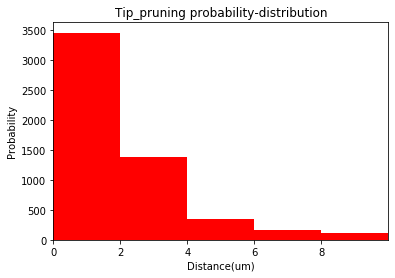

In [15]:
probability_distribution(list(map(float,list(dis_data['diss']))), 2, 1)

In [9]:
tif1_02="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif1_02/"
tif2_02="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif2_02/"
tif1_26="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif1_26/"
tif2_26="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif2_26/"
tif1_612="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif1_612/"
tif2_612="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif2_612/"

tif1_12="/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/tif1_12/"


In [17]:
os.mkdir(tif1_02)
os.mkdir(tif2_02)
os.mkdir(tif1_26)
os.mkdir(tif2_26)
os.mkdir(tif1_612)
os.mkdir(tif2_612)

In [10]:
#os.mkdir(tif1_12)
dis=[0,0,0,0,0,0]
for i in range(len(dis_data)):
    #print(dis_data.tif1.iloc[i])
    #print(dis_data.tif2.iloc[i])
    if 0 == int(float(dis_data.diss.iloc[i])) :
        dis[0]=dis[0]+1
    if 0 < int(float(dis_data.diss.iloc[i])) <= 2:
        copyfile(dis_data.tif1.iloc[i],tif1_02+dis_data.tif1.iloc[i].split("/")
                 [len(dis_data.tif1.iloc[i].split("/"))-1])
        dis[1]=dis[1]+1
    if 2 < int(float(dis_data.diss.iloc[i])) <= 4:  
        dis[2]=dis[2]+1
    if 4 < int(float(dis_data.diss.iloc[i])) <= 6:  
        dis[3]=dis[3]+1 
    if 6 < int(float(dis_data.diss.iloc[i])) <= 8:  
        dis[4]=dis[4]+1
    if 8 < int(float(dis_data.diss.iloc[i])) <= 10:  
        dis[5]=dis[5]+1
    if 0 <= int(float(dis_data.diss.iloc[i])) < 2:
        copyfile(dis_data.tif2.iloc[i],tif2_02+dis_data.tif2.iloc[i].split("/")
                 [len(dis_data.tif2.iloc[i].split("/"))-1])
    if 2 <= int(float(dis_data.diss.iloc[i])) < 6:
        copyfile(dis_data.tif1.iloc[i],tif1_26+dis_data.tif1.iloc[i].split("/")
                 [len(dis_data.tif1.iloc[i].split("/"))-1])
    if 2 <= int(float(dis_data.diss.iloc[i])) < 6:
        copyfile(dis_data.tif2.iloc[i],tif2_26+dis_data.tif2.iloc[i].split("/")
                 [len(dis_data.tif2.iloc[i].split("/"))-1])
    if 6 <= int(float(dis_data.diss.iloc[i])) < 10:#12
        copyfile(dis_data.tif1.iloc[i],tif1_612+dis_data.tif1.iloc[i].split("/")
                 [len(dis_data.tif1.iloc[i].split("/"))-1])
    if 6 <= int(float(dis_data.diss.iloc[i])) < 10:#12
        copyfile(dis_data.tif2.iloc[i],tif2_612+dis_data.tif2.iloc[i].split("/")
                 [len(dis_data.tif2.iloc[i].split("/"))-1])
    if 10 <= int(float(dis_data.diss.iloc[i])):#12
        print(dis_data.tif2.iloc[i])
        copyfile(dis_data.tif2.iloc[i],tif1_12+dis_data.tif2.iloc[i].split("/")
                 [len(dis_data.tif2.iloc[i].split("/"))-1])
print(dis)

/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/18454_00097_r56_24401_8328.75_2434.99_croped.tif
/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/18454_00097_r43_24661.8_8952.79_2627.44_croped.tif
/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/17545_00071_r289_27541.4_16896.5_2633.87_croped.tif
/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/17302_00054_r49_20933.2_14269.8_3874.96_croped.tif
/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/17545_00071_r273_27171.1_16547.9_2891_croped.tif
/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/17545_00089_r400_31509.2_23746.7_3982.01_croped.tif
/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/all_refined_xy/17302_00038_r91_21110.2_11197.6_5223.02_croped.tif
/home/braincenter5/Des

In [11]:
x1_02,y1_02=tif_plot(tif1_02,10,1)
x2_02,y2_02=tif_plot(tif2_02,10,1)
  
x1_26,y1_26=tif_plot(tif1_26,10,1)
x2_26,y2_26=tif_plot(tif2_26,10,1)

x1_612,y1_612=tif_plot(tif1_612,10,1)
x2_612,y2_612=tif_plot(tif2_612,10,1)


4472
3460
1725
1725
275
275


In [260]:
print((y1_02-y2_02))

[ 3.32774566  2.54277457  1.37916448  0.42293941  0.06251384 -0.06937148
 -0.10669166 -0.10896937 -0.11624722 -0.11530065]


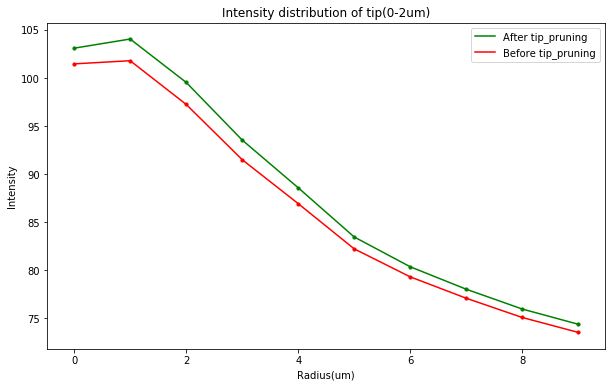

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x2_02,y2_02,color='green',label="After tip_pruning")
plt.plot(x1_02,y1_02,color='red',label="Before tip_pruning")
plt.scatter(x2_02,y2_02,c='g',s=10)#画散点图
plt.scatter(x1_02,y1_02,c='r',s=10)#画散点图
plt.legend(loc = 'upper right')
plt.title('Intensity distribution of tip(0-2um)')
plt.xlabel('Radius(um)')
plt.ylabel('Intensity')
plt.savefig("/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/dis0-2.pdf")
plt.show()  


In [261]:
print((y1_26-y2_26))

[-15.72057971 -15.99207729 -12.90123847  -9.14810521  -6.35409189
  -3.82192625  -2.51799974  -1.71917973  -1.16131996  -0.82376581]


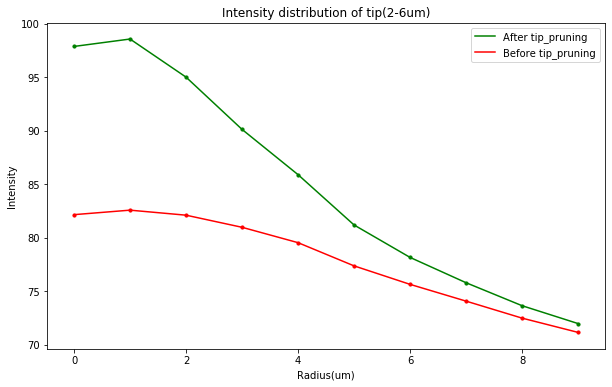

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x2_26,y2_26,color='green',label="After tip_pruning")
plt.plot(x1_26,y1_26,color='red',label="Before tip_pruning")
plt.scatter(x2_26,y2_26,c='g',s=10)#画散点图
plt.scatter(x1_26,y1_26,c='r',s=10)#画散点图
plt.legend(loc = 'upper right')
plt.title('Intensity distribution of tip(2-6um)')
plt.xlabel('Radius(um)')
plt.ylabel('Intensity')
plt.savefig("/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/dis2-6.pdf")
plt.show()  

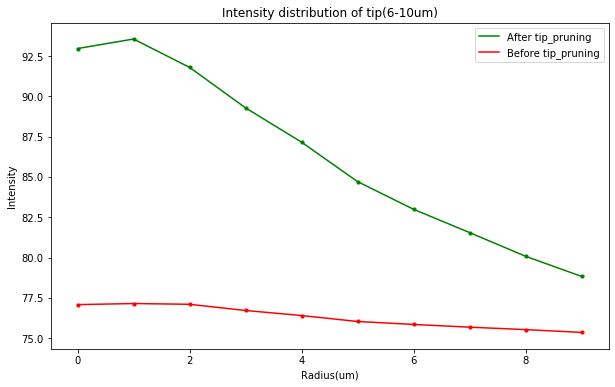

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x2_612,y2_612,color='green',label="After tip_pruning")
plt.plot(x1_612,y1_612,color='red',label="Before tip_pruning")
plt.scatter(x2_612,y2_612,c='g',s=10)#画散点图
plt.scatter(x1_612,y1_612,c='r',s=10)#画散点图
plt.legend(loc = 'upper right')
plt.title('Intensity distribution of tip(6-10um)')
plt.xlabel('Radius(um)')
plt.ylabel('Intensity')
plt.savefig("/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/dis6-12.pdf")
plt.show()  

In [14]:
dif1=y2_02-y1_02
dif2=y2_26-y1_26
dif3=y2_612-y1_612

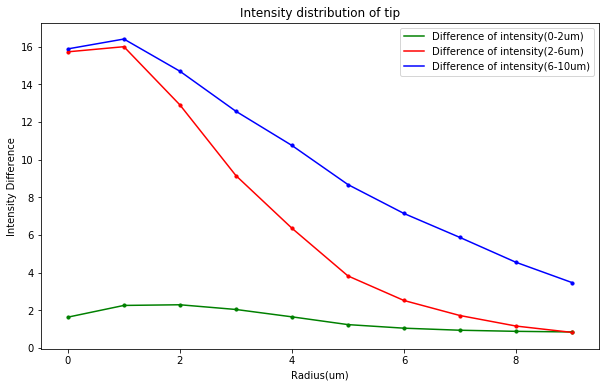

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x1_612,dif1,color='green',label="Difference of intensity(0-2um)")
plt.plot(x1_612,dif2,color='red',label="Difference of intensity(2-6um)")
plt.plot(x1_612,dif3,color='blue',label="Difference of intensity(6-10um)")
plt.scatter(x2_612,dif1,c='g',s=10)#画散点图
plt.scatter(x1_612,dif2,c='r',s=10)#画散点图
plt.scatter(x1_612,dif3,c='b',s=10)#画散点图
plt.legend(loc = 'upper right')
plt.title('Intensity distribution of tip')
plt.xlabel('Radius(um)')
plt.ylabel('Intensity Difference')
plt.savefig("/home/braincenter5/Desktop/bouton_detection/17302s/28evaluation_data_11.8/diff.pdf")
plt.show() 

In [224]:
# dit={}
# for i in list(dis_data['diss']):
#     #print(i)
#     nums=list(dis_data['diss']).count(i)
#     dit[i]=nums
# list1=[]
# [list1.append(i) for i in list(dis_data['diss']) if not i in list1]
# print(list1)
